In [1]:
from dataclasses import replace
import pandas as pd 
import matplotlib.pyplot as plt

def getDataset():
    data = pd.read_csv('Data2.csv',sep=';',encoding='cp1252')
    return data 

dataset = getDataset()

datasetDataframe = pd.DataFrame(dataset)

print(dataset)


           Country Name                      Region GDP per capita  \
0           Afghanistan                  South Asia    561,7787463   
1               Albania       Europe & Central Asia     4124,98239   
2               Algeria  Middle East & North Africa    3916,881571   
3        American Samoa         East Asia & Pacific    11834,74523   
4               Andorra       Europe & Central Asia    36988,62203   
..                  ...                         ...            ...   
213  West Bank and Gaza  Middle East & North Africa    2943,404534   
214         Yemen, Rep.  Middle East & North Africa     990,334774   
215              Zambia          Sub-Saharan Africa    1269,573537   
216            Zimbabwe          Sub-Saharan Africa    1029,076649   
217          Luxembourg       Europe & Central Asia    100738,6842   

     Populatiion CO2 emission     Area  
0     34656032.0     9809,225   652860  
1      2876101.0     5716,853    28750  
2     40606052.0   145400,217  23817

In [2]:
def toFloat(dataset,columnName):
    dataset[columnName] = dataset[columnName].str.replace(',', '.').astype(float)

toFloat(dataset,'GDP per capita')
toFloat(dataset,'CO2 emission')
toFloat(dataset,'Area')
dataset.dtypes

print(dataset)

           Country Name                      Region  GDP per capita  \
0           Afghanistan                  South Asia      561.778746   
1               Albania       Europe & Central Asia     4124.982390   
2               Algeria  Middle East & North Africa     3916.881571   
3        American Samoa         East Asia & Pacific    11834.745230   
4               Andorra       Europe & Central Asia    36988.622030   
..                  ...                         ...             ...   
213  West Bank and Gaza  Middle East & North Africa     2943.404534   
214         Yemen, Rep.  Middle East & North Africa      990.334774   
215              Zambia          Sub-Saharan Africa     1269.573537   
216            Zimbabwe          Sub-Saharan Africa     1029.076649   
217          Luxembourg       Europe & Central Asia   100738.684200   

     Populatiion  CO2 emission       Area  
0     34656032.0      9809.225   652860.0  
1      2876101.0      5716.853    28750.0  
2     40606052.

In [3]:
def replaceNeg(dataset,columnName):
    dataset[columnName] = abs(dataset[columnName])

replaceNeg(dataset,'Area')
replaceNeg(dataset,'GDP per capita')

print(dataset[dataset['Area']<0])
print(dataset[dataset['GDP per capita']<0])

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []
Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []


In [4]:
def replaceNull(dataset,columnName):
    mean = dataset[columnName].mean()
    dataset[columnName].fillna(mean,inplace = True)
replaceNull(dataset,'CO2 emission')
replaceNull(dataset,'GDP per capita')
replaceNull(dataset,'Populatiion')
print(dataset)

           Country Name                      Region  GDP per capita  \
0           Afghanistan                  South Asia      561.778746   
1               Albania       Europe & Central Asia     4124.982390   
2               Algeria  Middle East & North Africa     3916.881571   
3        American Samoa         East Asia & Pacific    11834.745230   
4               Andorra       Europe & Central Asia    36988.622030   
..                  ...                         ...             ...   
213  West Bank and Gaza  Middle East & North Africa     2943.404534   
214         Yemen, Rep.  Middle East & North Africa      990.334774   
215              Zambia          Sub-Saharan Africa     1269.573537   
216            Zimbabwe          Sub-Saharan Africa     1029.076649   
217          Luxembourg       Europe & Central Asia   100738.684200   

     Populatiion   CO2 emission       Area  
0     34656032.0    9809.225000   652860.0  
1      2876101.0    5716.853000    28750.0  
2     406060

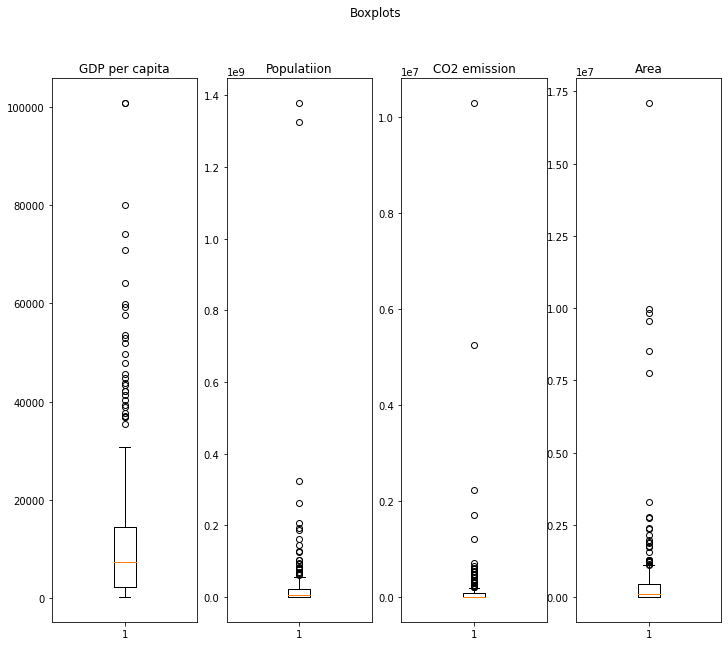

In [5]:
def multipleBoxplot(dataset):
    fig, [ax1,ax2,ax3,ax4] = plt.subplots(1,4,figsize=(12,10))
    
    fig.suptitle('Boxplots')
    ax1.set_title('GDP per capita')
    ax1.boxplot(dataset['GDP per capita'])
    ax2.set_title('Populatiion')
    ax2.boxplot(dataset['Populatiion'])
    ax3.set_title('CO2 emission')
    ax3.boxplot(dataset['CO2 emission'])
    ax4.set_title('Area')  
    ax4.boxplot(dataset['Area'])

multipleBoxplot(dataset)

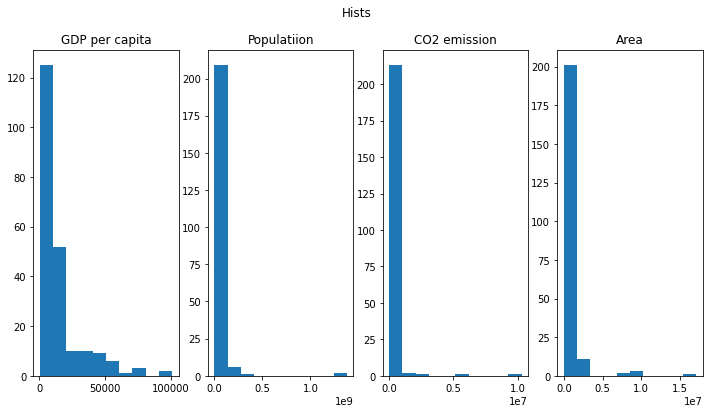

In [6]:
def multipleHist(dataset):
    fig, [ax1,ax2,ax3,ax4] = plt.subplots(1,4,figsize=(12,6))
    
    fig.suptitle('Hists')
    ax1.set_title('GDP per capita')
    ax1.hist(dataset['GDP per capita'])
    ax2.set_title('Populatiion')
    ax2.hist(dataset['Populatiion'])
    ax3.set_title('CO2 emission')
    ax3.hist(dataset['CO2 emission'])
    ax4.set_title('Area')  
    ax4.hist(dataset['Area'])
multipleHist(dataset)

In [7]:
def addPopulationDensity(dataset):
    dataset['Population Density'] = dataset['Populatiion'] / dataset["Area"]
addPopulationDensity(dataset)


In [9]:
print('The biggest GDP per capita:')
print(dataset[dataset['GDP per capita'] == dataset['GDP per capita'].max()]['Country Name'])


The biggest GDP per capita:
115    Luxembourg
217    Luxembourg
Name: Country Name, dtype: object


In [11]:
print('The smallest area size:')
print(dataset[dataset['Area'] == dataset['Area'].min()]['Country Name'])


The smallest area size:
130    Monaco
Name: Country Name, dtype: object


In [36]:
def findMaxAverageAreaRegion(dataset):
    maxAverageArea = dataset.groupby('Region').mean()['Area'].idxmax()
    print(maxAverageArea)

print('Max AVG area region: ')
findMaxAverageAreaRegion(dataset)

Max AVG area region: 
North America


In [41]:
def maxPopulationWorld(dataset):
    print(dataset[dataset['Populatiion'] == dataset['Populatiion'].max()]['Country Name'])

print('The most populated country in world:')
maxPopulationWorld(dataset)

The most populated country in world:
41    China
Name: Country Name, dtype: object


In [46]:
def maxPopulationEurope(dataset):
    subset = dataset[dataset['Region'] == 'Europe & Central Asia']
    print(subset[subset['Populatiion'] == subset['Populatiion'].max()]['Country Name'])

print('The most populated country in Europe:')
maxPopulationEurope(dataset)

The most populated country in Europe:
160    Russian Federation
Name: Country Name, dtype: object


In [68]:
def checkMatchMeanAndMedian(dataset):
    mean = dataset.groupby('Region').mean()['GDP per capita']
    median = dataset.groupby('Region').median()['GDP per capita']
    print('Mean: ')
    print(mean)
    print('Median: ')
    print(median)
    print(pd.merge(mean,median,how = 'inner'))
checkMatchMeanAndMedian(dataset)

Mean: 
Region
East Asia & Pacific           15167.283188
Europe & Central Asia         24118.335042
Latin America & Caribbean     10594.160252
Middle East & North Africa    15524.452803
North America                 37908.026498
South Asia                     2795.213935
Sub-Saharan Africa             2907.230014
Name: GDP per capita, dtype: float64
Median: 
Region
East Asia & Pacific            5910.620932
Europe & Central Asia         13902.625305
Latin America & Caribbean     10833.201075
Middle East & North Africa    13902.625305
North America                 42183.295100
South Asia                     1576.608412
Sub-Saharan Africa             1034.390361
Name: GDP per capita, dtype: float64
Empty DataFrame
Columns: [GDP per capita]
Index: []


In [72]:
def topAndBottomGDP(dataset):
    sortedByGRP = dataset.sort_values(by='GDP per capita', ascending = False)
    print('Top 5 by GDP per capita:')
    print(sortedByGRP.head(5))
    print('Bottom 5 by GDP per capita:')
    print(sortedByGRP.tail(5))
topAndBottomGDP(dataset)

Top 5 by GDP per capita:
         Country Name                 Region  GDP per capita  Populatiion  \
217        Luxembourg  Europe & Central Asia    100738.68420     582972.0   
115        Luxembourg  Europe & Central Asia    100738.68420     582972.0   
188       Switzerland  Europe & Central Asia     79887.51824    8372098.0   
116  Macao SAR, China    East Asia & Pacific     74017.18471     612167.0   
146            Norway  Europe & Central Asia     70868.12250    5232929.0   

     CO2 emission      Area  Population Density  
217      9658.878    2590.0          225.085714  
115      9658.878    2590.0          225.085714  
188     35305.876   41290.0          202.763333  
116      1283.450      30.3        20203.531353  
146     47626.996  385178.0           13.585742  
Bottom 5 by GDP per capita:
                 Country Name              Region  GDP per capita  \
118                Madagascar  Sub-Saharan Africa      401.742270   
37   Central African Republic  Sub-Saharan Afr

In [77]:
def topAndBottomCO2PerCapita(dataset):
    #Add column with CO2 per capita
    dataset['CO2 per capita'] = dataset['CO2 emission'] / dataset['Populatiion']
    sortedByCO2PerCapita = dataset.sort_values(by = 'CO2 per capita', ascending = False)
    print('Top 5 by CO2 per capita')
    print(sortedByCO2PerCapita.head(5))
    print('Bottom 5 by CO2 per capita')
    print(sortedByCO2PerCapita.tail(5))
topAndBottomCO2PerCapita(dataset)


Top 5 by CO2 per capita
                 Country Name                     Region  GDP per capita  \
182  St. Martin (French part)  Latin America & Caribbean    13902.625305   
163                San Marino      Europe & Central Asia    47908.561410   
130                    Monaco      Europe & Central Asia    13902.625305   
145  Northern Mariana Islands        East Asia & Pacific    22572.378820   
3              American Samoa        East Asia & Pacific    11834.745230   

     Populatiion   CO2 emission   Area  Population Density  CO2 per capita  
182      31949.0  164359.479257   54.4          587.297794        5.144433  
163      33203.0  164359.479257   60.0          553.383333        4.950139  
130      38499.0  164359.479257    2.0        19249.500000        4.269188  
145      55023.0  164359.479257  460.0          119.615217        2.987105  
3        55599.0  164359.479257  200.0          277.995000        2.956159  
Bottom 5 by CO2 per capita
         Country Name         